# Image Processing

## Import

In [170]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
#requirements
import nibabel as nib
import glob
from pathlib import Path
from sklearn.cluster import KMeans

## Retrieving all file paths 

In [21]:
def get_file_paths(file_ext = 'img', ipath = '../raw_data/OASIS2'):
    '''retrieve all file paths(*.img)'''
    full_path = []
    for p in Path(ipath).rglob("*."+file_ext):
        full_path.append(str(p))
        
    return full_path

## get images in dataframe

In [177]:
def get_img_df(file_ext = 'img', 
               ipath = '../raw_data/OASIS2', 
               datatype = 'mean', no_rows = -1):
    '''
    Get image dataframe.
    'Subject ID', 'session', 'file_names', 'full_path', 'image_files'
    datatype = 'mean' returns mean of 128 images of each mri image format.
    datatype = '3d' returns all 128 images of each mri image format.
    '''
    full_path = get_file_paths(file_ext, ipath)
    
    if no_rows == -1:
        number = len(full_path)
    else:
        number = no_rows
        
    file_lists = []
    for i in full_path[:number]:
        #[i[28:37], i[38:41], i[46:], i, mri_file])
        if datatype == 'mean':
            mri_file = np.mean(nib.load(i).get_fdata(), axis = 2)
        elif datatype == '3d':
            mri_file = nib.load(i).get_fdata()
        
        file_lists.append([i[28:37], i[38:41], i[46:], i, mri_file])

    file_df = pd.DataFrame(file_lists, columns = ['Subject ID', 'session', 'file_names', 'full_path', 'image_files'])
    return file_df

In [143]:
filedir = '../raw_data/OASIS2'



In [145]:
samples_3d = get_img_df('img', filedir, datatype = '3d', no_slice = 10)

In [172]:
def plot_mri_image(dataframe, subject_id = 'OAS2_0001', loc = 64):
    '''
    Plot mri images. 
    '''
    subject_df = dataframe[dataframe['Subject ID'] == subject_id]
    
    for i in range(len(subject_df)):
        img = subject_df['image_files'].iloc[i]
        if len(img.shape) == 3:
            plt.imshow(np.rot90(img))
            plt.title(f'''Subject ID : {subject_df['Subject ID'].iloc[i]}, 
                      Session : {subject_df['session'].iloc[i]}, 
                      File : {subject_df['file_names'].iloc[i]}''')
            plt.show()
        elif len(img.shape) == 4:
            plt.imshow(np.rot90(img[:,:,loc]))
            plt.title(f'''Subject ID : {subject_df['Subject ID'].iloc[i]}, 
                      Session : {subject_df['session'].iloc[i]}, 
                      File : {subject_df['file_names'].iloc[i]}''')
            plt.show()
    

In [147]:
len(samples_3d.image_files[0].shape)

4

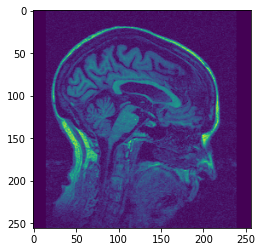

In [148]:
plt.imshow(np.rot90(samples_3d.image_files[0][:,:,64]))

In [118]:
samples_3d['Subject ID']

0    OAS2_0071
1    OAS2_0071
2    OAS2_0071
3    OAS2_0071
4    OAS2_0146
5    OAS2_0146
6    OAS2_0146
7    OAS2_0146
8    OAS2_0152
9    OAS2_0152
Name: Subject ID, dtype: object

In [124]:
samples_3d.image_files.iloc[0][50,50,:]

array([[ 121.],
       [ 243.],
       [ 238.],
       [ 236.],
       [ 101.],
       [ 204.],
       [ 176.],
       [ 273.],
       [ 213.],
       [  91.],
       [  19.],
       [  94.],
       [  95.],
       [  61.],
       [  92.],
       [  43.],
       [ 155.],
       [ 177.],
       [ 190.],
       [ 109.],
       [ 223.],
       [  52.],
       [  90.],
       [  69.],
       [  59.],
       [  78.],
       [ 125.],
       [ 117.],
       [ 205.],
       [ 156.],
       [  58.],
       [ 213.],
       [ 266.],
       [ 144.],
       [ 279.],
       [ 246.],
       [ 148.],
       [ 308.],
       [ 143.],
       [ 362.],
       [ 350.],
       [ 127.],
       [ 481.],
       [ 630.],
       [ 883.],
       [ 690.],
       [ 982.],
       [1263.],
       [1741.],
       [1339.],
       [1638.],
       [1393.],
       [1072.],
       [1569.],
       [1777.],
       [1522.],
       [1197.],
       [1406.],
       [1139.],
       [1465.],
       [1638.],
       [1257.],
       [

In [127]:
np.rot90(samples_3d.image_files.iloc[0]).shape

(256, 256, 128, 1)

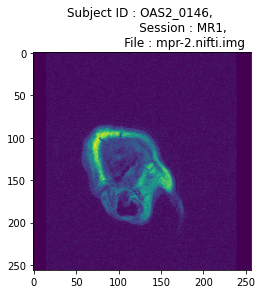

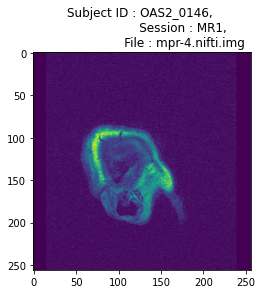

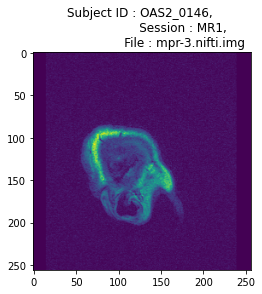

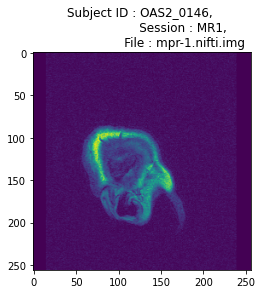

In [175]:
plot_mri_image(samples_3d, subject_id = 'OAS2_0146', loc = 5)

In [153]:
img1 = samples_3d.iloc[0]['image_files']


In [154]:
img1[:,:,0].max()

4095.0

In [156]:
img_res = img1.reshape(256 * 256 * 128, 1)

In [157]:
color_count = len(pd.DataFrame(img_res).value_counts())

In [158]:
color_count

3969

In [159]:

km50 = KMeans(n_clusters=50)
km256 = KMeans(n_clusters = 256)


In [161]:
compressed_50 = km50.fit(img_res)

In [163]:
km50_compressed = np.array(km50.cluster_centers_[km50.labels_])

In [165]:
len(pd.DataFrame(km50_compressed).value_counts())

50

In [166]:
img1_comp = km50_compressed.reshape(img1.shape)

In [167]:
img1_comp.shape

(256, 256, 128, 1)

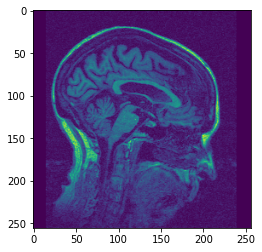

In [169]:
plt.imshow(np.rot90(img1_comp[:,:,64]))

In [ ]:
def compress_img(dataframe, no_compress = 50, no_rows = -1):
    compressed_images = []
    if no_rows == -1:
        number = len(full_path)
    else:
        number = no_rows
    
    new_df = dataframe.iloc[:number]
    
    km50 = KMeans(n_clusters=50)
        
    for i in range(number):
        
        img = dataframe.image_files.iloc[i]
        
        if len(img.shape) == 4:
            img_res = img.reshape(256 * 256 * 128, 1)
        elif len(img.shape) == 3:
            img_res = img.reshape(256*256, 1)
        
        compressed_50 = km50.fit(img_res)
        km50_compressed = np.array(km50.cluster_centers_[km50.labels_])
        img_comp = km50_compressed.reshape(img.shape)

#Kmeans train for every single image?
    
    